# Introduction to Geopandas

GeoPandas is a Python library for geospatial data.

Import it with its standards abbreviation:

In [2]:
# this is a library we will explore
import geopandas as gpd

# will use for making maps
import matplotlib.pyplot as plt

## Data

We will use simplified data about wild pig (*Sus scrofa*) sightings in CA.
Data is from Global Biodiversity Information Facility (GBIF).

Read in the data in a shapefile .shp using the `geopandas` function `.gpd.read_file()`""

In [4]:
# read in the data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

Core data structure of Geopandas is `geopandas.GeoDataFrame`

`geopandas.GeoDataFrame` = think of it as a `pandas.DataFrame` with a dedicated geometry column

The **geometry column** in a `gpd.DataFrame` holds the geometry (point, polygon) of each spatial feature. This column is of type `geopandas.GeoSeries`.

The other non-geometry columns in the geoDataFrame sre our usual `pd.Series` type



In [5]:
#type of pig dataframe
print(type(pigs))

#type of geometry column
print(type(pigs.geometry))

#type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is reflected in the `dtypes`

In [6]:
#check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric information

Two other important attributes of a `ppd.GeoDataFrame` are its coordinate reference system (CRS) and its extent. 

Think of the CRS as instructions to locate each feature on the surface of the Earth.

We can access the CRS of the geoDataFrame using the `crs` attribute


In [7]:
#access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geoDataFrame is the bounding box covering *all* of the features in the geoDataFrame

We access information to create the exted of a GeoDataFrame using the `total_bounds` attribute

In [8]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling

Geopandas is built on top of `pandas`, so (almost) everything we have learned about wrangling pandas data, still applies here.

**Example**

We only want to use recent data for hte wild pig observations.


In [10]:
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection


In [15]:
# only recent sightings
pigs_recent = pigs[pigs.year>=2020]

#print length of original df
print(len(pigs))

#print the length of the subset
print(len(pigs_recent))

1046
606


## Plotting

Similarly to a `pd.DataFrame`, a `gpd.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `gpd.GeoDataFrame` will be used to create the axes of the plot.

<AxesSubplot:>

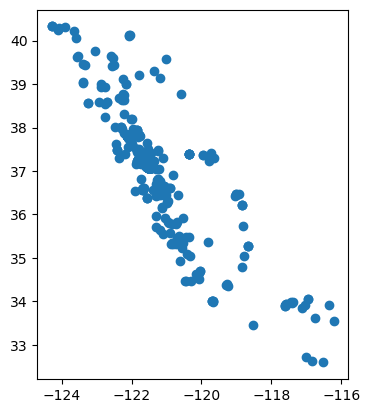

In [16]:
pigs_recent.plot()

## `Matplotlib`'s `fig` and `ax`

Going forward, we will often want to make more complex visualizations where we add different layers to a graph and customize it. To do this we will use the matplotlib Python library for creating visualizations. We can interact with `matplotlib` via its `pyplot` interface, which we imported at the top of the notebook as

```python
import matplotlib.pyplot as plt
```



`Matplotlib` graphs the data in a **figure** which can have one or more **axes**. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

1. Initialize a new figure and axes by calling pyplot’s `subplots()` function,
2. show the graph using `plt.show()`:

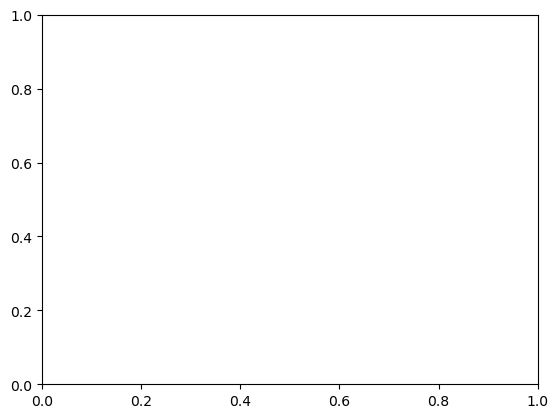

In [17]:
# create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()

Notice we get a figure with a single empty axis. We can think of this step as setting a new blank canvas on which we will paint upon.

### Adding a Layer

When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot a dataframe `df` onto an axis is:

```python
# create new figure and axis
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax=ax, 
        ...)   # other arguments for plot function

# display figure
plt.show()
```
**Example**

The first layer we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

<function matplotlib.pyplot.show(close=None, block=None)>

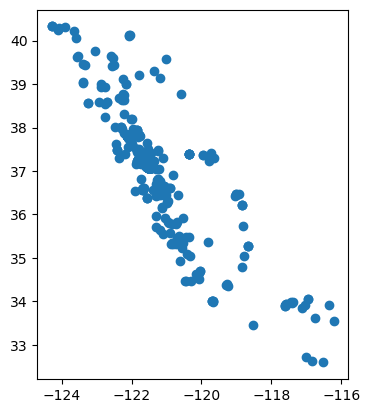

In [19]:
# create new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# display figure
plt.show

### Customization

`Matplotlib` allows for a lot of customization. Some of it can be done directly in the `plot()` method for the dataframe (like we’ve done when ploting data using pandas), while other is done by updating attributes of the axis `ax`. 

**Example**

Some basic customization for our pigs data could looke like this:


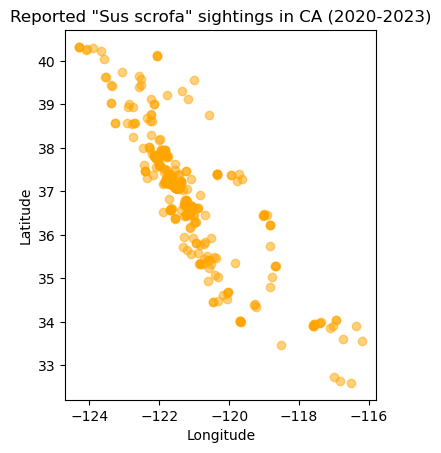

In [23]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='orange'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

## Exercise

1. open CA boundary .shp and store as ca_boundary variable. How many features does it have?
2. add it to pig sighting graph so that the CA boundary appears behind the points.


In [53]:
#read in data
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

# look at head of CA boundary, it has 1 feature
ca_boundary.head()

#geom_type will show what kind of vector data is stored in each feature of the geometry column
print(ca_boundary.geom_type)

0    MultiPolygon
dtype: object


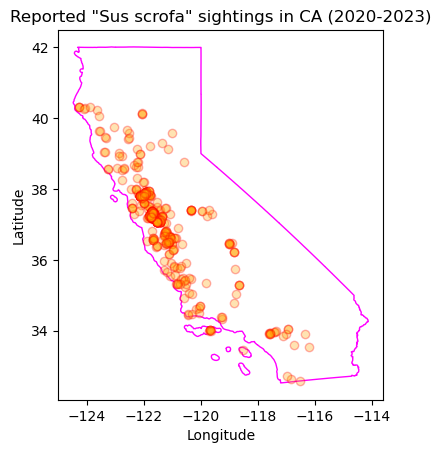

In [55]:
# initialize empty figure
fig, ax = plt.subplots()

# add ca_boundary to blank figure
ca_boundary.plot(ax=ax,
                color='none',
                 edgecolor='magenta')
# add pig_recent to figure with CA outline
pigs_recent.plot(ax=ax,
                 alpha=0.3,
                 color='orange',
                  edgecolor='red')
                 

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()